In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Conv3D
from tensorflow.keras.models import Sequential

In [ ]:
# Create a sample grayscale image
image = np.array([[1, 1, 1, 0, 0],
                  [0, 1, 1, 1, 0],
                  [0, 0, 1, 1, 1],
                  [0, 0, 1, 1, 0],
                  [0, 1, 1, 0, 0]], dtype=np.float32)

In [ ]:
# Define the vertical edge detector filter
vertical_edge_filter = np.array([[1, 0, -1],
                                  [1, 0, -1],
                                  [1, 0, -1]], dtype=np.float32)

identity_filter = np.array([[0, 0, 0],
                             [0, 1, 0],
                             [0, 0, 0]], dtype=np.float32)

vertical_edge_filter = np.array([[-1, 0, 1],
                                 [-2, 0, 2],
                                 [-1, 0, 1]], dtype=np.float32)

sobel_filter_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]], dtype=np.float32)

sobel_filter_y = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]], dtype=np.float32)

gaussian_filter = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]], dtype=np.float32) / 16.0

In [ ]:
# Add batch and channel dimensions to the image
image = image.reshape(1, 5, 5, 1)

In [ ]:
# Create a Sequential model
model = Sequential()

In [ ]:
# Add a Conv2D layer with the vertical edge detector filter
model.add(Conv2D(filters=1, kernel_size=(3, 3), input_shape=(5, 5, 1), padding='valid', use_bias=False, activation='relu'))

In [ ]:
# Set the weights of the Conv2D layer to the vertical edge detector filter
model.layers[0].set_weights([vertical_edge_filter.reshape(3, 3, 1, 1)])

In [ ]:
# Perform convolution on the image
feature_map = model.predict(image)

1/1 [==============================] - 0s 26ms/step


Text(0.5, 1.0, 'Original Image')

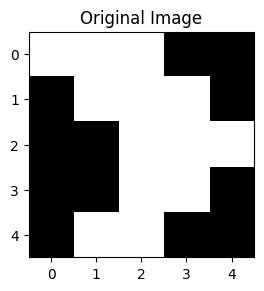

In [ ]:
# Plot the original image and the feature map
plt.subplot(1, 2, 1)
plt.imshow(image[0, :, :, 0], cmap='gray')
plt.title('Original Image')

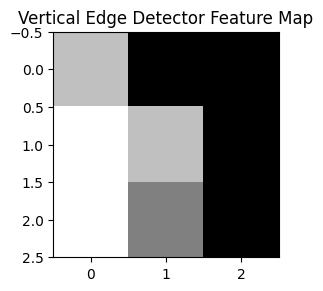

In [ ]:
plt.subplot(1, 2, 2)
plt.imshow(feature_map[0, :, :, 0], cmap='gray')
plt.title('Vertical Edge Detector Feature Map')
plt.show()